In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [98]:
plt.style.use('ggplot')

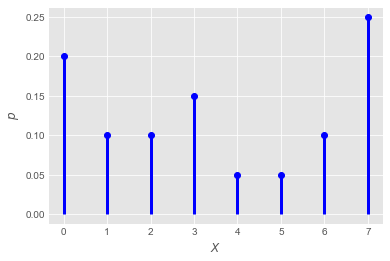

In [99]:
xk = np.arange(8)
pk = (0.2, 0.1, 0.1, 0.15, 0.05, 0.05, 0.1, 0.25)

spring = sts.rv_discrete(values=(xk,pk))
sample = spring.rvs(size=1000)

plt.plot(xk,pk,'bo')
plt.vlines(xk,0,pk,'b',linewidths=3)
plt.xlabel('$X$')
plt.ylabel('$p$')
plt.show()

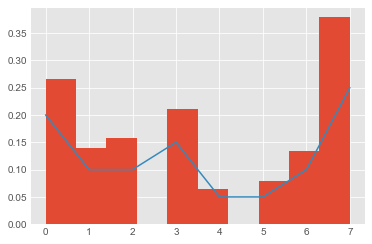

In [100]:
x = np.arange(8)
spring_pmf = spring.pmf(x)
plt.hist(sample, density=True)
plt.plot(x, spring_pmf)
plt.show()

In [101]:
res_mean = np.array([])
res = {}
for n in range(5,50,5):
    for i in range(1000):
        res_mean = np.append(res_mean, spring.rvs(size=n).mean())
    res[n] = res_mean
    res_mean = np.array([])

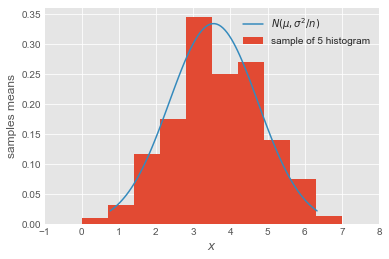

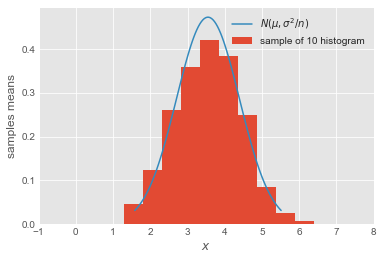

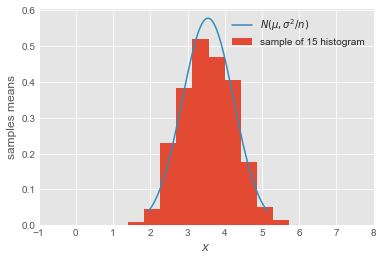

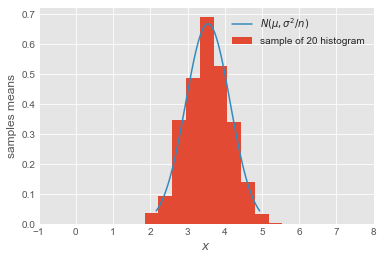

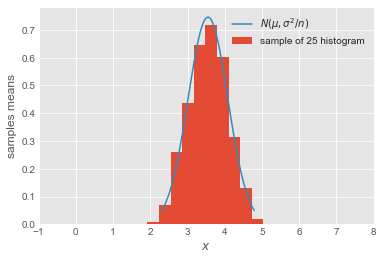

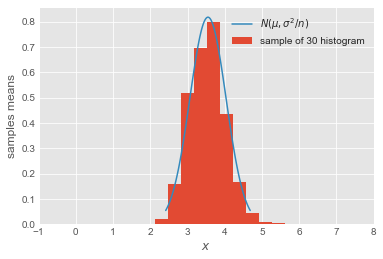

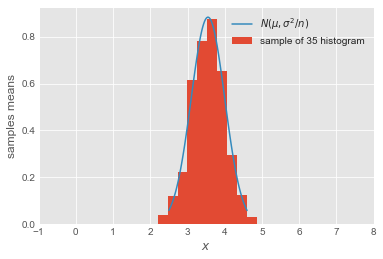

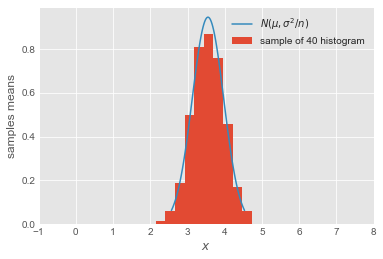

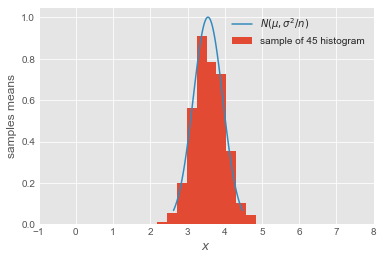

In [102]:
for n, mean in res.items():
    plt.hist(mean, density=True, label=f'sample of {n} histogram')
    
    std_norm = np.sqrt(spring.std()**2 / n)
    x = np.linspace(sts.norm.ppf(0.01, loc=spring.mean(), scale=std_norm), sts.norm.ppf(0.99, loc=spring.mean(), scale=std_norm), 100)
    plt.plot(x, sts.norm.pdf(x, loc=spring.mean(), scale=std_norm), label=r'$N(\mu , \sigma^2/n)$')
    
    plt.legend()
    plt.xlim(-1,8)
    plt.ylabel('samples means')
    plt.xlabel('$x$')
    plt.show()